# Logistic regression (gradient descent)



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load the data

In [2]:
data = load_breast_cancer()

## Play with the data

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
print(data.data.shape)
print(data.data)

(569, 30)
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [7]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
print(data.target.shape)
print(data.target_names)
print(data.target)

(569,)
['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1

In [9]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['class'] = data.target

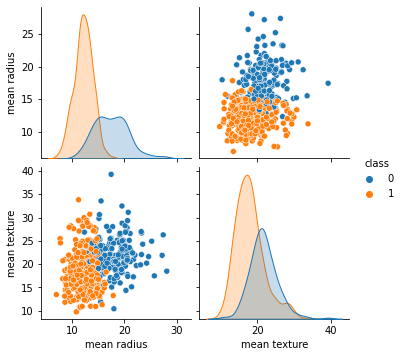

In [10]:
g = sns.pairplot(df, vars=['mean radius', 'mean texture'], hue="class")

In [11]:
df.values.shape

(569, 31)

In [12]:
X = data.data
y = np.expand_dims(data.target, axis=1) 

In [13]:
X.shape, y.shape

((569, 30), (569, 1))

## Prepare the data

Split the data: train and test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
print( X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(398, 30) (398, 1)
(171, 30) (171, 1)


Scale the data

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
print( X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(398, 30) (398, 1)
(171, 30) (171, 1)


## Build the model

In [18]:
def logistic_regression(X, y , lr, epochs):
    
    w = np.random.rand(X.shape[0], 1)
    b = np.random.rand(1)[0]
    m = X.shape[1]

    loss = []

    # IMPLEMENT YOU CODE HERE
    for i in range(epochs):
      # compute linear combination and activation
      z = w.T @ X + b
      yhat = ( 1 + np.exp(-z) )**(-1)
      dz = yhat - y
      
      # compute gradients
      dw = (1.0/m) * ( X @ dz.T )
      db = (1.0/m) * np.sum( dz )

      # update parameters
      w = w - lr * dw
      b = b - lr * db

      loss.append(   -(1.0/m)*np.sum( y*np.log(yhat) + (1.0-y)*np.log(1.0-yhat) )  )
      
    return {
        'w':w,
        'b':b,
        'loss':loss
        }

## Train the model

In [19]:
result = logistic_regression(X = X_train.T, y = y_train.T, lr= 0.01, epochs=10000 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


In [20]:
result['loss'][-1]

0.06436385724450042

## Function to make predictions

In [21]:
def predict( w, b, X ):
  z = w.T @ X + b
  yhat = ( 1.0 + np.exp(-z))**(-1) 

  #yhat[yhat>=0.5] = 1
  #yhat[yhat<0.5] = 0
  yhat = np.around(yhat)
  return yhat

## Evaluate the model

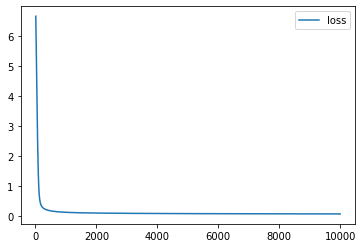

In [22]:
plt.plot(result['loss'], label='loss')
plt.legend()

In [23]:
y_train_hat = predict(result['w'], result['b'], X_train.T)

In [24]:
print('Acc: ', np.sum(y_train_hat.T == y_train)/y_train.shape[0])

Acc:  0.9899497487437185


## Make predictions

In [25]:
y_test_hat = predict(result['w'], result['b'], X_test.T)

In [26]:
print('Acc: ', np.sum(y_test_hat.T == y_test)/y_test.shape[0])

Acc:  0.9824561403508771


In [27]:
print(result['w'])
print(result['b'])

[[-0.82314823]
 [-0.53659689]
 [-0.41838797]
 [-0.32208064]
 [-0.27127828]
 [ 0.03355959]
 [-0.9650361 ]
 [-0.40698642]
 [-0.12069945]
 [ 0.5121034 ]
 [-0.79751287]
 [-0.10824803]
 [-0.49976064]
 [-0.76318936]
 [-0.25399742]
 [ 0.48089693]
 [ 0.2506348 ]
 [-0.3541031 ]
 [ 0.40004296]
 [ 0.9341158 ]
 [-0.92283379]
 [-0.71499273]
 [-0.73085844]
 [-0.88129045]
 [-0.85440127]
 [ 0.12877692]
 [-0.76152461]
 [-0.77259694]
 [-0.41139167]
 [-0.51177091]]
0.6098486864224154
